In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
import regex
import time
from tqdm import tqdm



1. Comparison of time Prometheus vs AWS


In [2]:
prometheus = pd.read_csv('dane/results_prometheus.txt',sep='\t',header=None, names=["cpu","steps","n","obl","kom","tot"])
prometheus = prometheus.groupby('cpu')['obl','kom','tot'].mean()
prometheus

/tmp/ipykernel_28127/966463388.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  prometheus = prometheus.groupby('cpu')['obl','kom','tot'].mean()


,obl,kom,tot
cpu,,,
2,37.176567,0.028992,37.205559
4,21.325760,0.281270,21.607030
8,10.309573,0.224182,10.533755
12,6.882250,0.463718,7.345969
15,5.436545,0.269421,5.705967


In [3]:
def make_plot(df):    
    df = df.set_index(pd.Series([2,4,8,12,15]))


    plt.plot(df,label=list(df.columns))
    plt.legend(loc='upper right');

    plt.xlabel("number of cores")
    plt.ylabel("time [s]")
    plt.show()

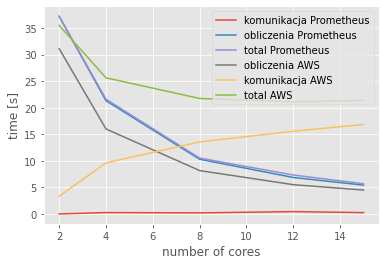

In [4]:
df = pd.DataFrame(data={
      'komunikacja Prometheus': prometheus.kom, 
      'obliczenia Prometheus': prometheus.obl,
      'total Prometheus': prometheus.tot,
      'obliczenia AWS': [31.11,16.01,8.18,5.53,4.52], 
      'komunikacja AWS': [3.37,9.62,13.57,15.58,16.85],
      'total AWS': [35.48,25.63,21.74,21.11,21.37]
})

make_plot(df)

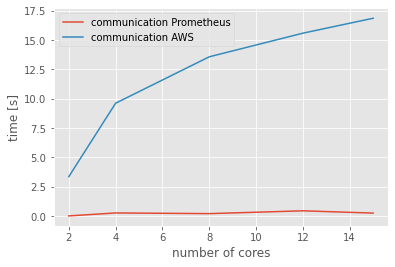

In [5]:
df = pd.DataFrame(data={
      'communication Prometheus': prometheus.kom, 
      'communication AWS': [3.37,9.62,13.57,15.58,16.85],

})


df = df.set_index(pd.Series([2,4,8,12,15]))


plt.plot(df,label=list(df.columns))
plt.legend(loc='upper left');

plt.xlabel("number of cores")
plt.ylabel("time [s]")
plt.show()

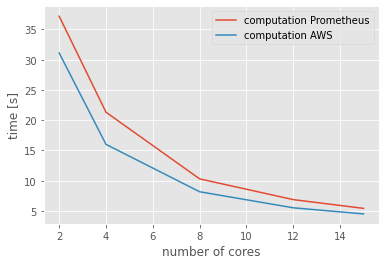

In [6]:
df = pd.DataFrame(data={
      'computation Prometheus': prometheus.obl,
      'computation AWS': [31.11,16.01,8.18,5.53,4.52], 

})

make_plot(df)

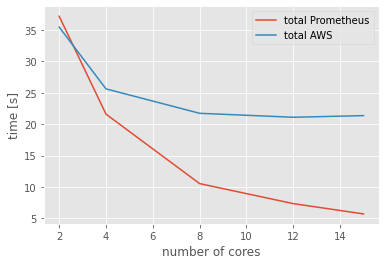

In [7]:
df = pd.DataFrame(data={
      'total Prometheus': prometheus.tot,
      'total AWS': [35.48,25.63,21.74,21.11,21.37]
})

make_plot(df)

2.Containerized MPI application running on HPC Cluster Prometheus

A.) comparison of times

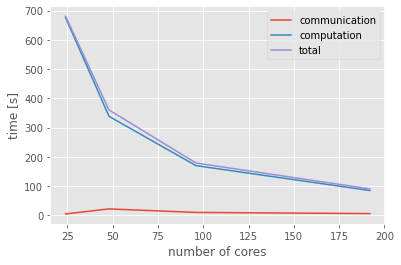

In [8]:
df = pd.DataFrame(data={
      'komunikacja Prometheus': [4.490134,21.635135,9.618401,5.579409], 
      'obliczenia Prometheus': [676.141240,338.308683,169.590798,84.504299],
      'total Prometheus': [680.631374,359.943819,178.587089,90.113135]
    
})

df = df.set_index(pd.Series([24,48,96,192]))

df

plt.plot(df,label=["communication","computation","total"])
plt.legend(loc='upper right');

plt.xlabel("number of cores")
plt.ylabel("time [s]")
plt.show()

B.) time, speedup, efficiency plots for computation time

In [9]:
# Dla każdego rozmiaru klastra wykonano 3 pomiary i policzono średnią oraz odchylenie standardowe
x =24*676 # We assume that time on 1 thread is 1/24 time on 24 threads. On Prometheus the computations for 1 tread took too long...
df = pd.DataFrame(data={
      'strong1': [x,676.026590,338.187417,169.119511,84.483489], 
      'strong2': [x,676.141240,338.308683,169.590798,84.504299],
      'strong3': [x,675.194583,338.238122,168.968689,84.533727],
})



df.index+=1
df

df = df.set_index(pd.Series([1,24,48,96,192]))

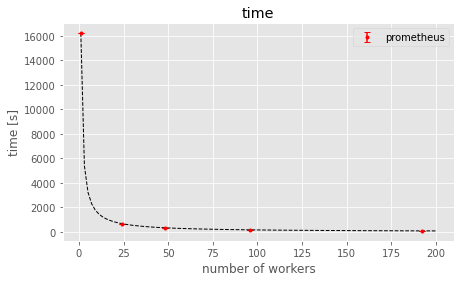

In [10]:
def line(formula):  
    x = np.linspace(1,200,100) # 100 linearly spaced numbers
    y = list(map(formula,x))
    plt.plot(x, y, '--', lw=1,color='black')

fig = plt.figure(figsize=(7,4))

i =0
name ='prometheus'
df2 = df.filter(regex='strong')
plt.errorbar(df.index, df2.mean(axis=1), df2.std(axis=1),c='r', label=name,linestyle='None',marker='.',capsize=3)

# print ideal curve
sequential = np.mean(df2.iloc[0]) 
line(lambda x:1/x*sequential)

    
plt.legend(loc='upper right');
plt.xlabel("number of workers")
plt.ylabel("time [s]")
plt.title(f'time')
plt.show()



Text(0.5, 1.0, 'speedup')

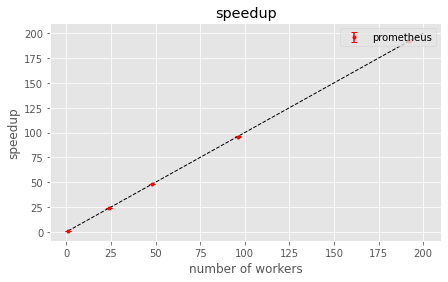

In [11]:
fig = plt.figure(figsize=(7,4))

speedup_strong = []
df2 = df.filter(regex='strong')
sequential = df2.iloc[0]
speedup = sequential /df2
speedup_strong.append(speedup.copy())
plt.errorbar(df.index, speedup.mean(axis=1), speedup.std(axis=1),c='r', label=name,linestyle='None',marker='.',capsize=3)
    
    
line(lambda x:x)
    
plt.legend(loc='upper right');
plt.xlabel("number of workers")
plt.ylabel("speedup")
plt.title(f"speedup")


Text(0.5, 1.0, 'efficiency')

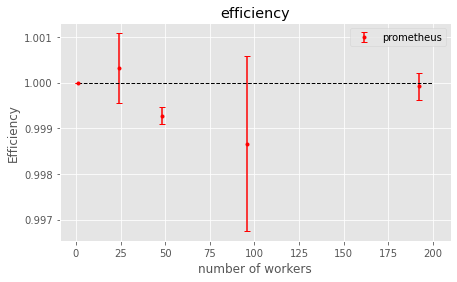

In [12]:


plt.figure(figsize=(7,4))

name ='prometheus'
efficiency = speedup_strong[0].div(df.index,axis =0)

plt.errorbar(df.index, efficiency.mean(axis=1), efficiency.std(axis=1),c='r', label=name,linestyle='None',marker='.',capsize=3)

line(lambda x:1)
    
plt.legend(loc='upper right');
plt.xlabel("number of workers")
plt.ylabel("Efficiency")
plt.title(f"efficiency")

